In [75]:
import pandas as pd

In [76]:
df = pd.read_csv('train.csv')

# Ï†ÑÏ≤òÎ¶¨

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 2. train + temp (validation+test) Î∂ÑÎ¶¨ (70%, 30%)
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42, shuffle=True)

# 3. tempÎ•º validation, testÎ°ú 50:50 Î∂ÑÎ¶¨ (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÎåÄÎπÑ 15%:15%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, shuffle=True)

# 4. Î∂ÑÌï†Îêú Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞ ÌôïÏù∏
print("Train Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", train_df.shape)
print("Validation Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", val_df.shape)
print("Test Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", test_df.shape)


Train Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (823383, 21)
Validation Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (176439, 21)
Test Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (176440, 21)


# Ï†ÑÏ≤òÎ¶¨

In [ ]:
import numpy as np
import pandas as pd

# 1. Age - Í≤∞Ï∏° Ï†úÍ±∞
train_df = train_df.dropna(subset=['Age'])

# 2. Gender - 0/1 Ïù∏ÏΩîÎî©
train_df['Gender'] = train_df['Gender'].map({'Male': 1, 'Female': 0})

# 3. Annual Income - Ï§ëÏïôÍ∞í ÎåÄÏ≤¥ + Î°úÍ∑∏Î≥ÄÌôò
train_df['Annual Income'] = train_df['Annual Income'].fillna(train_df['Annual Income'].median())
train_df['Annual Income'] = np.log1p(train_df['Annual Income'])

# 4. Marital Status - ÏµúÎπàÍ∞í ÎåÄÏ≤¥
mode = train_df['Marital Status'].mode()[0]
train_df['Marital Status'] = train_df['Marital Status'].fillna(mode)

# 5. Number of Dependents - Í≤∞Ï∏° Ï†úÍ±∞
train_df = train_df.dropna(subset=['Number of Dependents'])

# 6. Education Level - ÏàòÎèô Ïù∏ÏΩîÎî©
edu_map = {
  "High School": 0,
  "Bachelor's": 1,
  "Master's": 2,
  "PhD": 3
}
train_df["Education Level"] = train_df["Education Level"].map(edu_map)

# Health Score

# Ï§ëÏïôÍ∞í Í≥ÑÏÇ∞
median_val = train_df['Health Score'].median()

# Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥
train_df['Health Score'] = train_df['Health Score'].fillna(median_val)

import numpy as np
# Î°úÍ∑∏ Î≥ÄÌôò (log(1 + x) Î∞©ÏãùÏúºÎ°ú ÏùåÏàò/0 Î∞©ÏßÄ)
train_df['Health Score'] = np.log1p(train_df['Health Score'])
# IQR Í∞í Í∏∞Î∞ò Î≤îÏúÑ Í≥ÑÏÇ∞
Q1 = train_df['Health Score'].quantile(0.25)
Q3 = train_df['Health Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# IQR Î≤îÏúÑ ÎÇ¥ Í∞íÎßå ÎÇ®Í∏∞Í∏∞
train_df = train_df[(train_df['Health Score'] >= lower_bound) & (train_df['Health Score'] <= upper_bound)]

# 8. Location - ÏõêÌï´ Ïù∏ÏΩîÎî©
location_dummies = pd.get_dummies(train_df['Location'], prefix='Location')
train_df = pd.concat([train_df, location_dummies], axis=1)
train_df = train_df.drop(columns=['Location'])

# 9. Policy Type - ÏõêÌï´ Ïù∏ÏΩîÎî©
train_df = pd.get_dummies(train_df, columns=['Policy Type'])

# 10. Vehicle Age - Í≤∞Ï∏° Ï†úÍ±∞
train_df = train_df.dropna(subset=['Vehicle Age'])

# 11. Credit Score - Î¨∏Ïûê Ï†úÍ±∞ + ÌèâÍ∑† ÎåÄÏ≤¥ + Ïù¥ÏÉÅÏπò Ï†úÍ±∞
train_df['Credit Score'] = pd.to_numeric(train_df['Credit Score'], errors='coerce')
train_df['Credit Score'] = train_df['Credit Score'].fillna(train_df['Credit Score'].mean())

Q1 = train_df['Credit Score'].quantile(0.25)
Q3 = train_df['Credit Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_df = train_df[(train_df['Credit Score'] >= lower_bound) & (train_df['Credit Score'] <= upper_bound)]

# 12. Insurance Duration - Í≤∞Ï∏° Ï†úÍ±∞ + Ïù¥ÏÉÅÏπò Ï†úÍ±∞
train_df = train_df.dropna(subset=['Insurance Duration'])
Q1 = train_df['Insurance Duration'].quantile(0.25)
Q3 = train_df['Insurance Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_df = train_df[(train_df['Insurance Duration'] >= lower_bound) & (train_df['Insurance Duration'] <= upper_bound)]

# 13. Policy Start Date ‚Üí ÎÇ†Ïßú ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± + ÏõêÎ≥∏ Ï†úÍ±∞
train_df['Policy Start Date'] = pd.to_datetime(train_df['Policy Start Date'])
train_df['Start_Year'] = train_df['Policy Start Date'].dt.year
train_df['Start_Month'] = train_df['Policy Start Date'].dt.month
train_df['Start_Day'] = train_df['Policy Start Date'].dt.day
train_df['Start_Weekday'] = train_df['Policy Start Date'].dt.weekday
train_df = train_df.drop(columns=['Policy Start Date'])

# 14. Customer Feedback - Ïù∏ÏΩîÎî© + Í≤∞Ï∏° Ïó¨Î∂Ä ÌîºÏ≤ò + Í≤∞Ï∏° Ï†úÍ±∞
label_map = {'Poor': 0, 'Average': 1, 'Good': 2}
train_df['Customer Feedback'] = train_df['Customer Feedback'].map(label_map)
train_df['customer_feedback_missing'] = train_df['Customer Feedback'].isna().map({True: 0, False: 1})
train_df = train_df.dropna(subset=['Customer Feedback'])

# 15. Smoking Status - Î∂àÎ¶¨Ïñ∏ Ïù∏ÏΩîÎî©
train_df['Smoking Status_Num'] = train_df['Smoking Status'].map({True: 1, False: 0})

# 16. Exercise Frequency - ÏàúÏÑú Ïù∏ÏΩîÎî©
order_map = {'Rarely': 1, 'Monthly': 2, 'Weekly': 3, 'Daily': 4}
train_df['Exercise_Freq_Label'] = train_df['Exercise Frequency'].map(order_map)

# 17. Property Type - ÏõêÌï´ Ïù∏ÏΩîÎî©
prop_dummies = pd.get_dummies(train_df['Property Type'], prefix='Property')
train_df = pd.concat([train_df, prop_dummies], axis=1)

# 18. Previous Claims - Í≤∞Ï∏° 0 ‚Üí Íµ¨Í∞ÑÌôî ‚Üí Ïù∏ÏΩîÎî©
train_df['Previous Claims'] = train_df['Previous Claims'].fillna(0)
def map_claims_level(x):
  if x == 0:
      return 'Zero'
  elif 1 <= x <= 2:
      return 'Low(1-2)'
  else:
      return 'High(3+)'
train_df['Previous_Claims_Level'] = train_df['Previous Claims'].apply(map_claims_level)
train_df = pd.get_dummies(train_df, columns=['Previous_Claims_Level'])

# 19. Occupation - Í≤∞Ï∏° Ï±ÑÏö∞Í∏∞ + ÏõêÌï´ Ïù∏ÏΩîÎî©
missing_count = train_df['Occupation'].isnull().sum()
unique_values = train_df['Occupation'].dropna().unique()
fill_values = np.tile(unique_values, int(np.ceil(missing_count / len(unique_values))))[:missing_count]
np.random.shuffle(fill_values)
train_df.loc[train_df['Occupation'].isnull(), 'Occupation'] = fill_values
train_df = pd.get_dummies(train_df, columns=['Occupation'], prefix='Occ')

In [87]:
train_df.isna().sum()

id                                     0
Age                                    0
Gender                                 0
Annual Income                          0
Marital Status                         0
Number of Dependents                   0
Education Level                        0
Health Score                           0
Previous Claims                        0
Vehicle Age                            0
Credit Score                           0
Insurance Duration                     0
Customer Feedback                      0
Smoking Status                         0
Exercise Frequency                     0
Property Type                          0
Premium Amount                         0
Location_Rural                         0
Location_Suburban                      0
Location_Urban                         0
Policy Type_Basic                      0
Policy Type_Comprehensive              0
Policy Type_Premium                    0
Start_Year                             0
Start_Month     

/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/t202

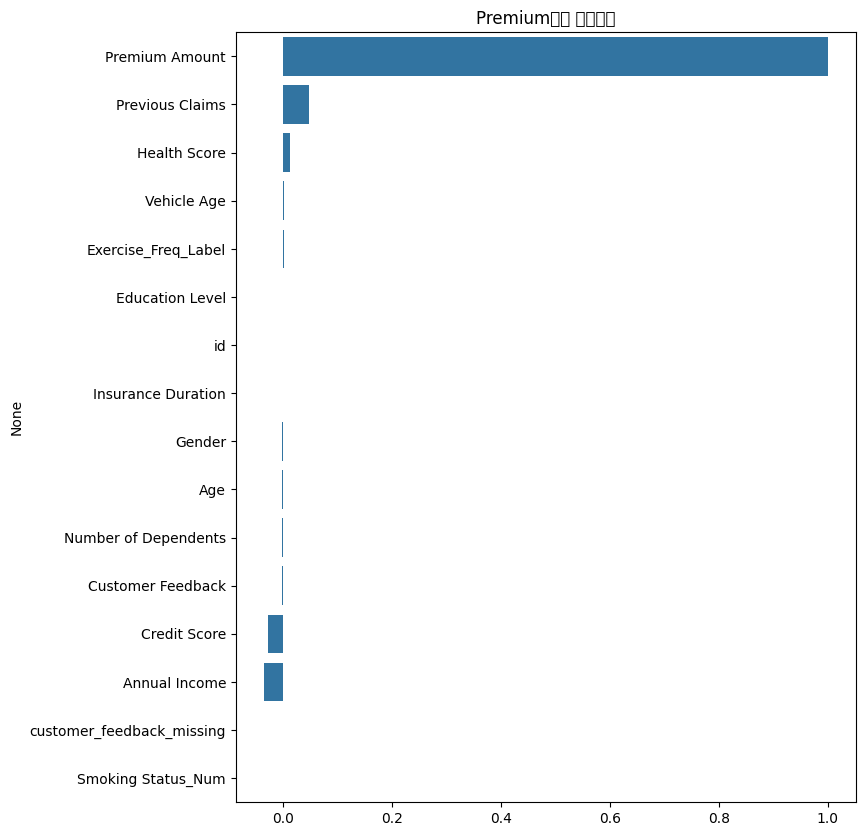

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt


# ÏàòÏπòÌòï Ïª¨ÎüºÎì§Îßå
num_cols = train_df.select_dtypes(include=['float64', 'int64'])


# ÌÉÄÍ≤üÍ≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
corr_target = num_cols.corr()['Premium Amount'].sort_values(ascending=False)


# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 10))
sns.barplot(x=corr_target.values, y=corr_target.index)
plt.title("PremiumÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
plt.show()


### ÌîºÏñ¥Ïä® & Ïä§ÌîºÏñ¥Îßå

/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/t2023-m0149/

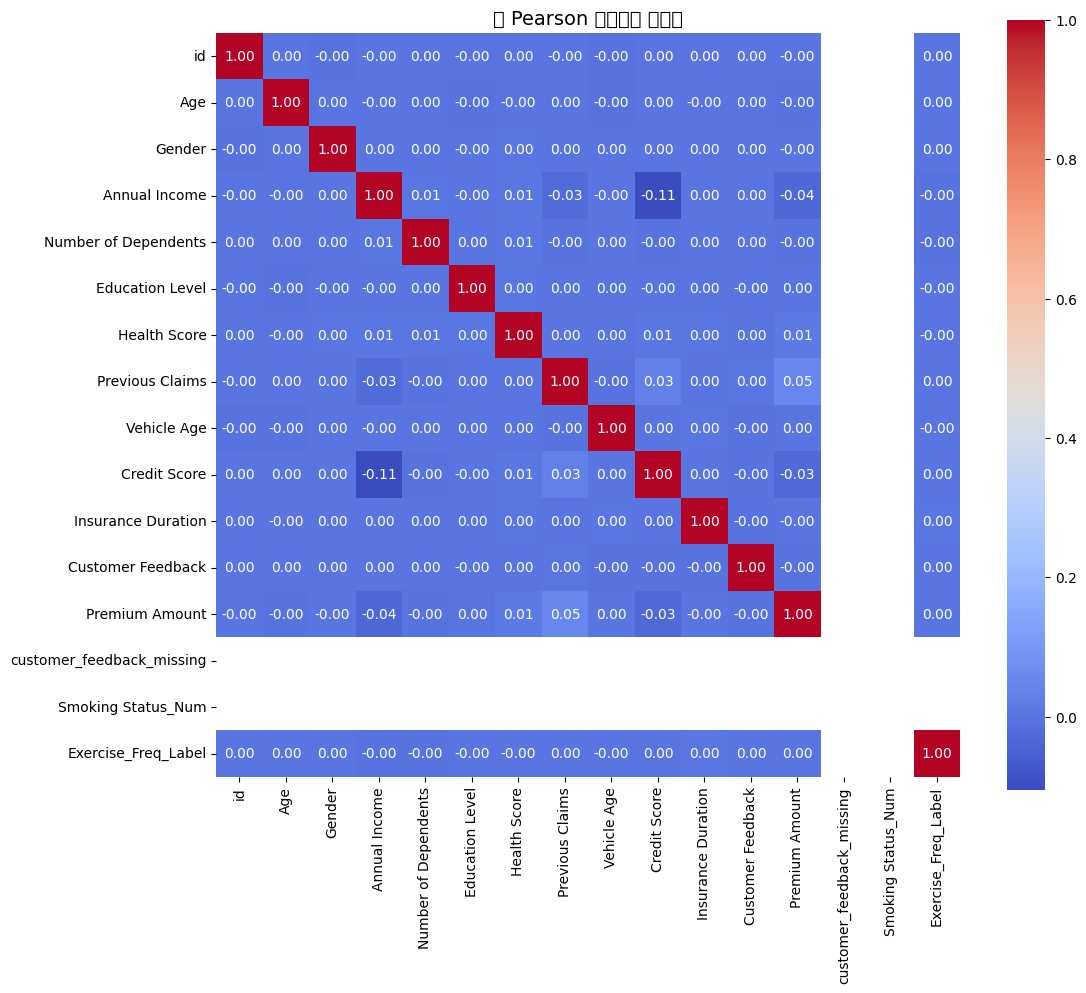

/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Use

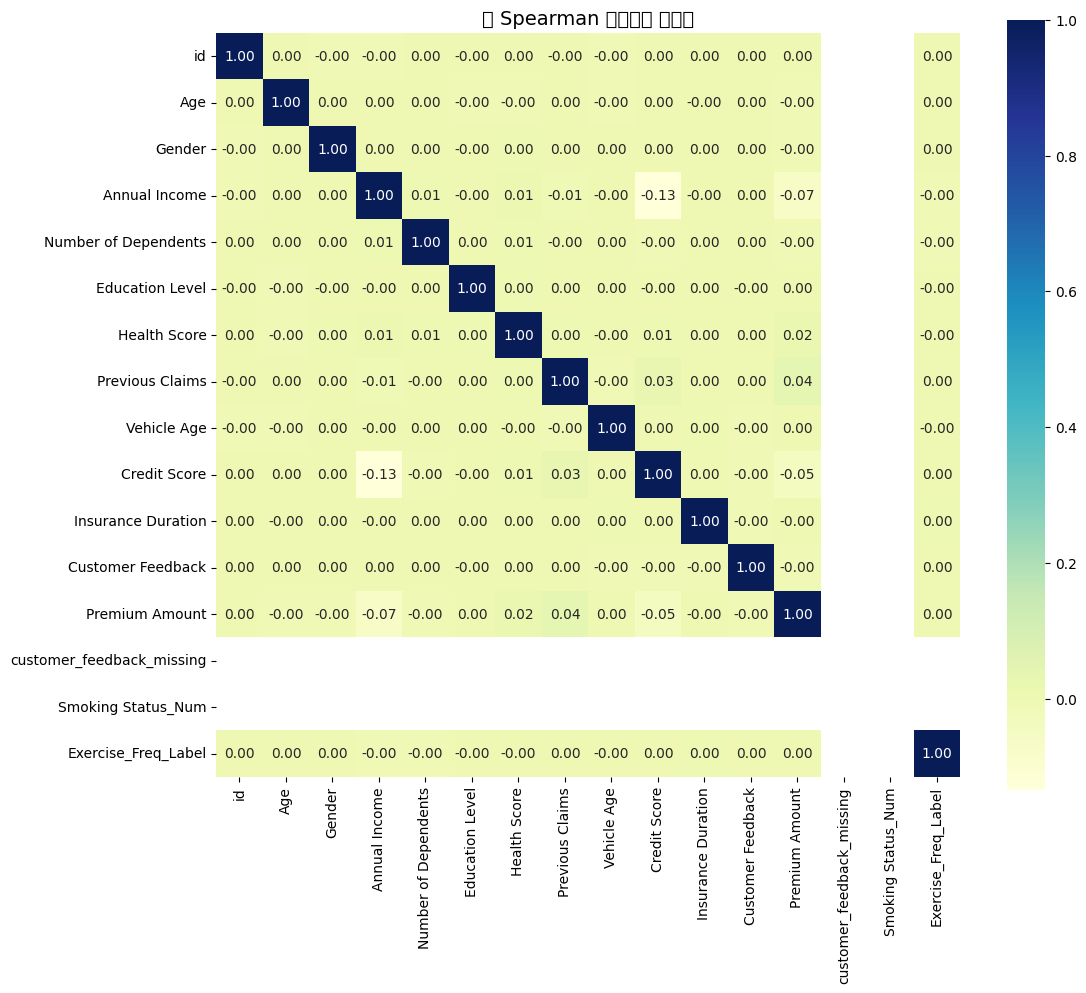

In [89]:
# 1. ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
plt.figure(figsize=(12, 10))
sns.heatmap(num_cols.corr(method='pearson'), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("üìä Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ", fontsize=14)
plt.show()


# ---------------------------
# 2. Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
plt.figure(figsize=(12, 10))
sns.heatmap(num_cols.corr(method='spearman'), annot=True, fmt=".2f", cmap='YlGnBu', square=True)
plt.title("üìà Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ", fontsize=14)
plt.show()

In [90]:
# Pearson Í∏∞Ï§Ä
pearson_corr = num_cols.corr(method='pearson')['Premium Amount'].sort_values(ascending=False)


# Spearman Í∏∞Ï§Ä
spearman_corr = num_cols.corr(method='spearman')['Premium Amount'].sort_values(ascending=False)


# ÎπÑÍµê ÌÖåÏù¥Î∏î
corr_compare = pd.DataFrame({
   'Pearson': pearson_corr,
   'Spearman': spearman_corr
})
print(corr_compare)

                            Pearson  Spearman
Age                       -0.001686 -0.001991
Annual Income             -0.035078 -0.067725
Credit Score              -0.028357 -0.045053
Customer Feedback         -0.002111 -0.002060
Education Level            0.000371  0.000305
Exercise_Freq_Label        0.001160  0.001200
Gender                    -0.001404 -0.001459
Health Score               0.012614  0.017599
Insurance Duration        -0.000571 -0.000532
Number of Dependents      -0.002032 -0.002853
Premium Amount             1.000000  1.000000
Previous Claims            0.047747  0.040309
Smoking Status_Num              NaN       NaN
Vehicle Age                0.002474  0.002936
customer_feedback_missing       NaN       NaN
id                        -0.000308  0.000872


/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                      Feature           VIF
16  customer_feedback_missing  2.017221e+06
12                 Start_Year  1.073202e+00
13                Start_Month  1.072881e+00
9                Credit Score  1.012118e+00
3               Annual Income  1.011812e+00
7             Previous Claims  1.001429e+00
14                  Start_Day  1.000365e+00
6                Health Score  1.000284e+00
4        Number of Dependents  1.000108e+00
18        Exercise_Freq_Label  1.000062e+00
10         Insurance Duration  1.000058e+00
11          Customer Feedback  1.000057e+00
8                 Vehicle Age  1.000051e+00
15              Start_Weekday  1.000050e+00
1                         Age  1.000035e+00
2                      Gender  1.000033e+00
5             Education Level  1.000027e+00
0                          id  1.000018e+00
17         Smoking Status_Num           NaN


/var/folders/b9/dfc3sg191zvbsylvkl6d4ty40000gn/T/ipykernel_15927/3931784621.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VIF", y="Feature", data=vif, palette="coolwarm")
/var/folders/b9/dfc3sg191zvbsylvkl6d4ty40000gn/T/ipykernel_15927/3931784621.py:53: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b9/dfc3sg191zvbsylvkl6d4ty40000gn/T/ipykernel_15927/3931784621.py:53: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b9/dfc3sg191zvbsylvkl6d4ty40000gn/T/ipykernel_15927/3931784621.py:53: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b9/dfc3sg191zvbsylvkl6d4ty40000gn/T/ipykernel_15927/3931784621.py:53: UserWarning: Gly

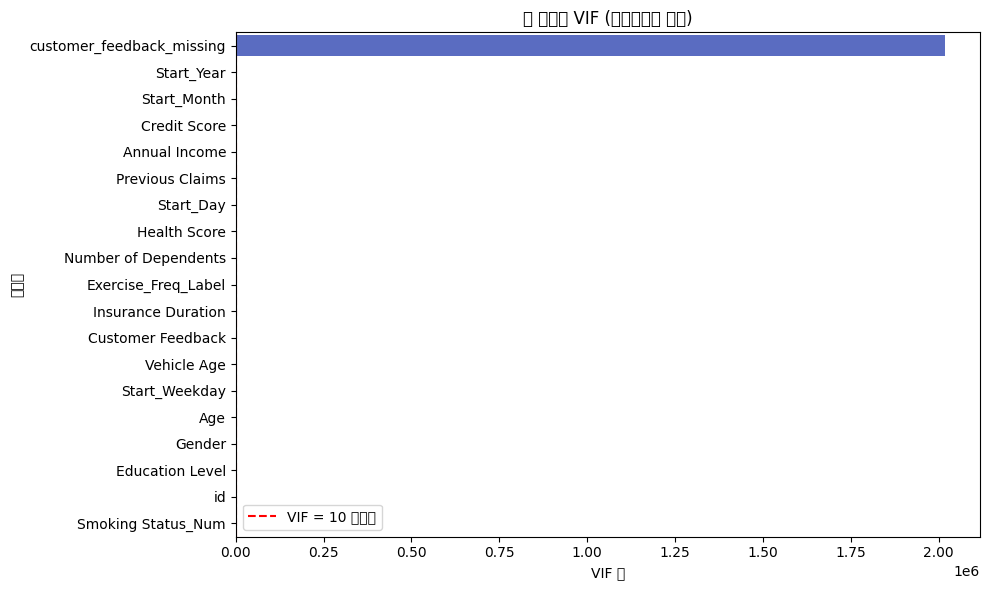

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# üéØ 1. ÏàòÏπòÌòï Î≥ÄÏàòÎßå ÏÑ†ÌÉù (Premium Amount Ï†úÏô∏)
X = train_df.select_dtypes(include=[np.number]).drop(columns=['Premium Amount'])

# üéØ 2. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (Ïó¨Í∏∞ÏÑ† 0ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ≤†Ïä¥Îã§)
X = X.fillna(0)

# üéØ 3. ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
X_const = add_constant(X)

# üéØ VIF Í≥ÑÏÇ∞ (Ï†ÑÏ≤¥ Ïó¥ Ïù∏Îç±Ïä§ Í∏∞Ï§Ä)
vif = pd.DataFrame()
vif["Feature"] = X_const.columns  # const Ìè¨Ìï®Îê®
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# üéØ ÏÉÅÏàòÌï≠ Ï†úÏô∏ÌïòÍ≥† Î≥¥Í∏∞
vif = vif[vif["Feature"] != "const"]
vif = vif.sort_values(by="VIF", ascending=False)

print(vif)

# VIF ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="Feature", data=vif, palette="coolwarm")
plt.title("üìä Î≥ÄÏàòÎ≥Ñ VIF (Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÏßÄÌëú)")
plt.xlabel("VIF Í∞í")
plt.ylabel("Î≥ÄÏàòÎ™Ö")
plt.axvline(x=10, color="red", linestyle="--", label="VIF = 10 Í∏∞Ï§ÄÏÑ†")
plt.legend()
plt.tight_layout()
plt.show()